In [1]:

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [2]:
img_array = cv2.imread("training/0/download (2).jpg")

In [3]:
img_array.shape #rgb

(48, 48, 3)

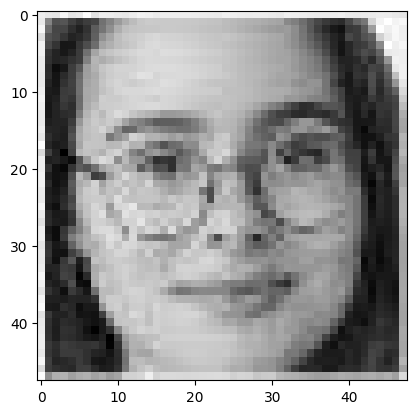

In [4]:
plt.imshow(img_array) ##BGR

In [5]:
Datadirectory = "training/" ##training dataset

In [6]:
Classes = ["0","1","2"] ##list of classes. has to be exact name as folders
#Classes = ["0","1","2","3","4","5","6","7","8","9"] ##for new

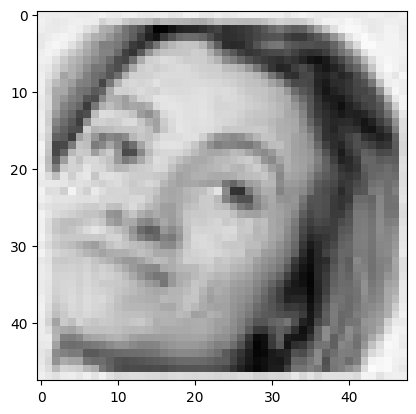

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break ##to avoid all pictures showing below
    break

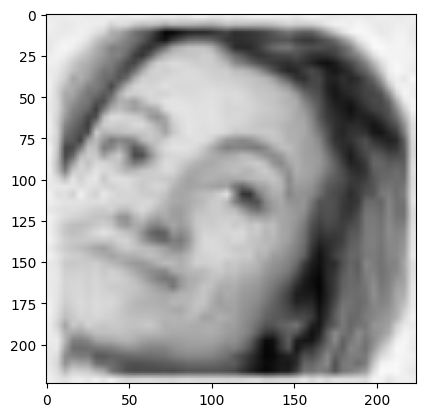

In [8]:
img_size = 224   #224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show() ##changing the size of all images for transfer learning

In [9]:
new_array.shape ##checking for current image size

(224, 224, 3)

# read all images and convert them to array

In [11]:
training_Data = [] ##data array

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 , 1 ie label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img)) ##read images into an array
                new_array = cv2.resize(img_array,(img_size,img_size)) ## resize image in array and add to new array
                training_Data.append([new_array,class_num]) ## appens new array and label to training data array
            except Exception as e:
                pass

In [12]:
create_training_data()  ##calling the function

In [13]:
print(len(training_Data))

6480


In [13]:
#temp = np.array(training_Data)
#temp.shape  ##just to check if I have two columns 1 for pictures , 2 for labels

In [14]:
import random

random.shuffle(training_Data) ##so that my deep learning module doesnt memorize the trining data

In [15]:
X = [] #data structure ie the picture
y = [] #the label either 0, 1, 2, 3, 4, 5, 6

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) ##converting it to 4 dimension


In [16]:
X.shape

(6480, 224, 224, 3)

In [17]:
#normalize the data. 
X = X/255.0; ##we could also do this with sckit

In [18]:
y[0] ##the labels 0 for Anger folder and so on

2

In [19]:
Y = np.array(y)
Y.shape

#NEW END HERE

(6480,)

# deep learning model for training - Transfer Learning

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import load_model

In [48]:
model = load_model("model_20ep.h5") #pretrained mobile. tab to select options

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

# Transfer Learning: Change the model last layer [-1] to 6 or 9 depending on how many classes I am working with. Tuning, weights will start from second to last layer

In [51]:
base_input = model.layers[0].input

In [52]:
base_output = model.layers[-2].output
base_output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'activation_1')>

In [53]:
final_output = layers.Dense(64)(base_output) ## adding a new layer after the model.layers[-2] layer
final_outputt = layers.Activation('relu')(final_output) ## layer activation
final_output = layers.Dense(32)(final_outputt) ## adding layer after layers.Dense(128)
final_outputt = layers.Activation('relu')(final_output) ## layer activation
final_output = layers.Dense(3,activation='softmax')(final_outputt) ## adding final layer after layers.Dense(64). change to 9
#final_output = layers.Dense(9,activation='softmax')(final_outputt) ##sice classification is 9 softmax is famous

In [54]:
final_output

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_8')>

In [55]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [57]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [58]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [41]:
# new_model.fit(X, Y, epochs = 25)

In [60]:

alln = len(training_Data)
idx_list=[(0, 200)]
start_num = 200
while start_num < alln:
    next_num = start_num + 200
    if next_num > alln:
        next_num = alln
    idx_list.append((start_num, next_num))
    start_num = next_num
print(idx_list)

[(0, 200), (200, 400), (400, 600), (600, 800), (800, 1000), (1000, 1200), (1200, 1400), (1400, 1600), (1600, 1800), (1800, 2000), (2000, 2200), (2200, 2400), (2400, 2600), (2600, 2800), (2800, 3000), (3000, 3200), (3200, 3400), (3400, 3600), (3600, 3800), (3800, 4000), (4000, 4200), (4200, 4400), (4400, 4600), (4600, 4800), (4800, 5000), (5000, 5200), (5200, 5400), (5400, 5600), (5600, 5800), (5800, 6000), (6000, 6200), (6200, 6400), (6400, 6480)]


In [ ]:
#idx_list=[(0, aa), (aa, ab), (ab, ac), (ac, ad), (ad, ae), (ae, af), (af, ag), (ag, ah), (ah, ai), (ai, aj), (aj, ak)]
#print(idx_list)

In [ ]:
#import time
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [61]:
epochsa = 2
for epoch in range(epochsa):
    print(f'epoch: {epoch+1}')
    for idx in idx_list:
        print(idx)
#         print(X[idx[0]:idx[1]], Y[idx[0]:idx[1]])
        new_model.fit(X[idx[0]:idx[1]], Y[idx[0]:idx[1]], batch_size = 8, epochs = 1)
        #time.sleep(3)

epoch: 1
(0, 200)
25/25 [==============================] - 6s 77ms/step - loss: 0.8865 - accuracy: 0.6400
(200, 400)
25/25 [==============================] - 2s 75ms/step - loss: 0.2708 - accuracy: 0.9150
(400, 600)
25/25 [==============================] - 2s 75ms/step - loss: 0.2364 - accuracy: 0.9050
(600, 800)
25/25 [==============================] - 2s 76ms/step - loss: 0.1754 - accuracy: 0.9250
(800, 1000)
25/25 [==============================] - 2s 76ms/step - loss: 0.2209 - accuracy: 0.9300
(1000, 1200)
25/25 [==============================] - 2s 76ms/step - loss: 0.2028 - accuracy: 0.9250
(1200, 1400)
25/25 [==============================] - 2s 76ms/step - loss: 0.1084 - accuracy: 0.9650
(1400, 1600)
25/25 [==============================] - 2s 75ms/step - loss: 0.1932 - accuracy: 0.9350
(1600, 1800)
25/25 [==============================] - 2s 76ms/step - loss: 0.1606 - accuracy: 0.9250
(1800, 2000)
25/25 [==============================] - 2s 75ms/step - loss: 0.2240 - accuracy:

In [40]:
#new_model.fit(X,Y, batch_size = 2, epochs = 15)

In [62]:
new_model.save("model_20_1ep.h5")